In questo progetto creaimo una tabella con dati dentro ad una database che creeremo da nuovo automaticamente (ma possiamo benissimo usarne uno gia esistente). utilizzeremo tutti strumenti open source come pgAdmin, Python ed alcuni dati di test.
in codice si divide in 3 blocchi, il primo creerà un database chiamato "database_name_IRIS" automaticamente in modalità background dentro pgAdmin sotto ad un server gia eistente. Il secondo blocco creerà la tabella, impostiamo alcuni vincoli ai dati convertendo alcuni tipi di dati che sono meglio leggibili da pgAdmin, qui tramite un ciclo for sulle colonne dei file ricreiamo le stesse ed il tipo di dato associato su pdAdmin. Il terzo ed ultimo blocco leggerà ed inserirà nella tabella precedentemente creata i dati presenti nel file csv. 🇮🇹

In this project we create a table with data inside a database that we will create automatically (but we can easily use an existing one). we will all use open source tools like pgAdmin, Python and some test data.
in code it is divided into 3 blocks, the first will create a database called "database_name_IRIS" automatically in background mode inside pgAdmin under an already existing server. The second block will create the table, we set some constraints on the data by converting some data types that are better readable by pgAdmin, here using a for loop on the columns of the files we recreate the same ones and the associated data type on pdAdmin. The third and final block will read and insert the data present in the csv file into the previously created table. 🇬🇧

<div align="center">
    
#### First block where we create the Database

</div>


In [14]:
import psycopg2
from IPython.display import Image


def create_database(database_name, user, password, host, port):
    try:
        # Connessione al database "postgres" 
        conn = psycopg2.connect(
            database="postgres",
            user=user,
            password=password,
            host=host,
            port=port
        )
        
        # interagire con il database 
        cur = conn.cursor()
        
        # la modalità di intrazione deve passare a True  
        conn.autocommit = True
        
        # Query SQL per creare un nuovo database
        create_db_query = f'CREATE DATABASE {database_name};'  
        
        # Esecuzione della query
        cur.execute(create_db_query)
        
    except (Exception, psycopg2.DatabaseError) as error:
        print(f"Errore durante la creazione del database: {error}")
    
    finally:
        if conn is not None:
            conn.close()
        print(f"database: '{database_name}' creato correttamente")


database_name = "database_name_IRIS"  # questo da cambiare 
user = "postgres"
password = "1234"                    
host = "localhost"  
port = "5432"       
create_database(database_name, user, password, host, port)


Errore durante la creazione del database: database "database_name_iris" already exists

database: 'database_name_IRIS' creato correttamente


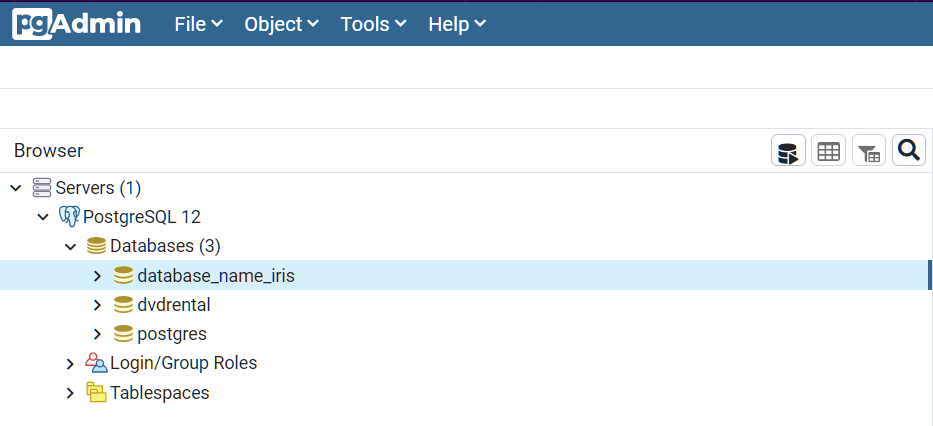

In [12]:
image_path = "C:/Users/Alessandro/Desktop/create database on pgadmin/a.jpg"
Image(filename=image_path, width=500, height=300)

<div align="center">
    
#### once we have created our DB and given it a name, we load a csv/excel file and create the columns and the table under our DB
   
</div>

In [18]:
import psycopg2
import pandas as pd

# Carica il file CSV in un DataFrame Pandas

csv_file_path = r'C:\Users\Alessandro\Downloads\iris.csv'
df = pd.read_csv(csv_file_path)

conn = psycopg2.connect(
database = "database_name_iris",  
user = "postgres",
password = "1234",
host = "localhost",  
port = "5432"     
)

# Ottieni il nome delle colonne e i tipi di dati corrispondenti
columns_and_types = []
for col in df.columns:
    column_name = col.replace(".", "_")
    data_type = df[col].dtype
    if data_type == 'int64':
        data_type = 'INTEGER'
    if data_type == 'object':
        data_type = 'VARCHAR'
    if data_type == 'float64':
        data_type = 'NUMERIC'
     

    columns_and_types.append((column_name, data_type))
        

# Crea la tabella nel database
table_name = 'nome_della_tua_tabella'
create_table_query = f"CREATE TABLE {table_name} ({', '.join([f'{col} {dtype} NULL' for col, dtype in columns_and_types])});"
conn.autocommit = True # se omesso non invierà i dati al db
cur = conn.cursor()
print(create_table_query)
cur.execute(create_table_query) 

# Chiudi la connessione al database
conn.close()


CREATE TABLE nome_della_tua_tabella (sepal_length NUMERIC NULL, sepal_width NUMERIC NULL, petal_length NUMERIC NULL, petal_width NUMERIC NULL, variety VARCHAR NULL);


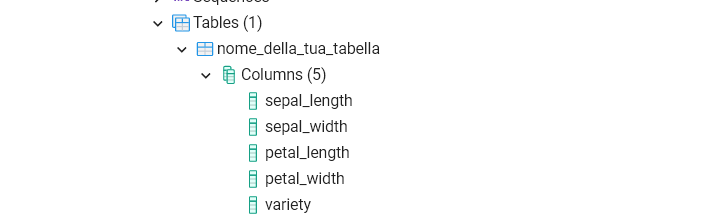

In [13]:
image_path = "C:/Users/Alessandro/Desktop/create database on pgadmin/b.PNG"
Image(filename=image_path, width=500, height=300)

<div align="center">

#### populate the table and columns create precedently with data finded in csv file

</div>

In [19]:
import psycopg2

conn = psycopg2.connect(
    database="database_name_iris",
    user="postgres",
    password="1234",
    host="localhost",
    port="5432"
)

csv_file_path = r'C:\Users\Alessandro\Downloads\iris.csv'
df = pd.read_csv(csv_file_path)


# Configura il cursore prima di eseguire le operazioni
cur = conn.cursor()

# Configura l'autocommit
conn.autocommit = True  # se omesso non invierà i dati al db
table_name = "nome_della_tua_tabella"

import csv

file_path = r'C:\Users\Alessandro\Downloads\iris.csv'

table_name = 'nome_della_tua_tabella'

with open(file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    headers = next(csv_reader)
    headers = [header.replace('.', '_') for header in headers]
    
    for row in csv_reader:
        # ogni elemento è sostituito con None se il suo valore è una stringa vuota (''), altrimenti mantiene il valore originale
        row = [None if value == '' else value for value in row]
        columns = ', '.join(headers)
        values = ', '.join(['%s' for _ in headers])
        
        query = f"INSERT INTO {table_name} ({columns}) VALUES ({values})"
        cur.execute(query, tuple(row))
        
     #   old way to to this thing:    
     #   Inserisci i valori nel database
     #   query = f"INSERT INTO {table_name} (PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked) VALUES (%s, %s, %s, %s, %s,%s, %s, %s, %s, %s, %s, %s)"
     #   cur.execute(query, (row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8],row[9],row[10],row[11] ))
                
                

conn.commit()
conn.close()


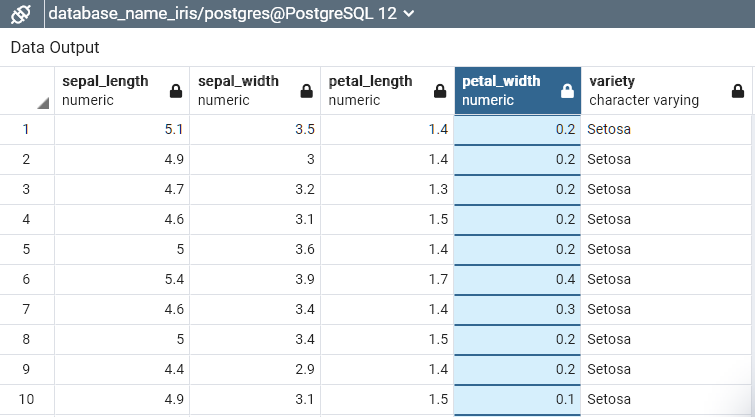

In [14]:
image_path = "C:/Users/Alessandro/Desktop/create database on pgadmin/c.PNG"
Image(filename=image_path, width=500, height=300)